In [3]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sn
import pandas as pd
import copy
from sklearn.metrics.pairwise import cosine_similarity


In [4]:
with open("../data/agreement_results.8.layer=6.only_attractors=True.only_not_attractors=False.alpha=4.0.classifier=sgd-log.copula.pickle", "rb") as f:
    data = pickle.load(f)

In [5]:
data.keys()

dict_keys(['obj_rel_across_anim.pickle', 'prrc_anim.pickle', 'prc_anim.pickle', 'prc_inanim.pickle', 'obj_rel_no_comp_across_inanim.pickle', 'obj_rel_no_comp_across_anim.pickle', 'subj_rel.pickle', 'obj_rel_across_inanim.pickle', 'simple_agrmt.pickle', 'prrc_inanim.pickle', 'sent_comp.pickle'])

In [18]:
x = data["obj_rel_across_anim.pickle"]["orrc"][7]

In [19]:
print(x["sentence"])
print(x["before"]["top_preds"][:100])
print("-------------------------------------")
print(print(x["after"]["top_preds"][:100]))

the farmers that the assistant loves are old .
[('are', 0.7890028), ('is', 0.06688326), ('were', 0.033254296), ('grow', 0.030653), ('get', 0.012717317), ('look', 0.00794552), ('grew', 0.005434556), ('gets', 0.005353271), ('was', 0.0035891149), ('grows', 0.0029674554), ('looks', 0.0025901496), ('die', 0.0018703748), ('seem', 0.0015513526), ('appear', 0.001456641), ('got', 0.0013599138), ('looked', 0.0012333182), ('died', 0.0008350642), ('feel', 0.0006648471), ('when', 0.00058166956), ('became', 0.00056203356), ('become', 0.00054323016), ('dies', 0.0004499462), ('runs', 0.00044500816), ('very', 0.00043045252), ('grown', 0.00034620683), ('am', 0.0003429001), ('seems', 0.00033984295), ('have', 0.00033177112), ('of', 0.00031364732), ('turns', 0.00031238951), ('be', 0.0002733955), ('seemed', 0.00026940217), ('stay', 0.00026468534), ('centuries', 0.00025192165), ('remain', 0.00024473525), ('like', 0.0002447119), ('becomes', 0.00023279553), ('as', 0.00022057944), ('turn', 0.00021404856), ('yea

In [88]:
len(data.keys())

11

In [89]:
data["obj_rel_across_anim.pickle"]

{'src': {'acc_before': 0.8028671405632652,
  'acc_after': 0.7342857121877551,
  'prob_good_before': 0.0037952603306621313,
  'prob_bad_before': 0.00656319921836257,
  'prob_good_after': 0.0023930715397000313,
  'prob_bad_after': 0.004690860863775015},
 'src_by': {'acc_before': 0.8028671405632652,
  'acc_after': 0.7428571407346939,
  'prob_good_before': 0.0037952603306621313,
  'prob_bad_before': 0.00656319921836257,
  'prob_good_after': 0.00485818088054657,
  'prob_bad_after': 0.006478044204413891},
 'orc': {'acc_before': 0.8028671405632652,
  'acc_after': 0.5914285697387756,
  'prob_good_before': 0.0037952603306621313,
  'prob_bad_before': 0.00656319921836257,
  'prob_good_after': 0.0012027135817334056,
  'prob_bad_after': 0.0005808878340758383},
 'orc_by': {'acc_before': 0.8028671405632652,
  'acc_after': 0.7685714263755102,
  'prob_good_before': 0.0037952603306621313,
  'prob_bad_before': 0.00656319921836257,
  'prob_good_after': 0.004314005374908447,
  'prob_bad_after': 0.004635247

In [90]:
relevant = [k for k in data.keys()]

In [91]:
relevant, len(relevant)

(['obj_rel_across_anim.pickle',
  'prrc_anim.pickle',
  'prc_anim.pickle',
  'prc_inanim.pickle',
  'obj_rel_no_comp_across_inanim.pickle',
  'obj_rel_no_comp_across_anim.pickle',
  'subj_rel.pickle',
  'obj_rel_across_inanim.pickle',
  'simple_agrmt.pickle',
  'prrc_inanim.pickle',
  'sent_comp.pickle'],
 11)

In [92]:
for k in copy.deepcopy(data):
    if k not in relevant:
        del data[k]

In [93]:
data.keys(), len(data.keys())

(dict_keys(['obj_rel_across_anim.pickle', 'prrc_anim.pickle', 'prc_anim.pickle', 'prc_inanim.pickle', 'obj_rel_no_comp_across_inanim.pickle', 'obj_rel_no_comp_across_anim.pickle', 'subj_rel.pickle', 'obj_rel_across_inanim.pickle', 'simple_agrmt.pickle', 'prrc_inanim.pickle', 'sent_comp.pickle']),
 11)

In [94]:
sims = np.zeros((len(data.keys()), 11))
print(sims.shape)
agrt_types = ["obj_rel_across_anim", "obj_rel_across_inanim", "obj_rel_no_comp_across_anim", "obj_rel_no_comp_across_inanim", "subj_rel", "sent_comp", "simple_agrmt", "prc_anim", "prc_inanim", "prrc_anim", "prrc_inanim"]
print("test", len(agrt_types), len(data.keys()))
#agrt_type2ind = {d:i for i,d in enumerate(data.keys())}
agrt_type2ind = {d+".pickle":i for i,d in enumerate(agrt_types)}
agrt_ind2type = {i:d for d,i in agrt_type2ind.items()}

rc_type2ind = {d:i for i,d in enumerate(data["obj_rel_across_anim.pickle"].keys())}
rc_ind2type = {i:d for d,i in rc_type2ind.items()}

print(len(rc_ind2type), len(agrt_type2ind))
print(rc_ind2type)
print(agrt_ind2type)

(11, 11)
test 11 11
11 11
{0: 'src', 1: 'src_by', 2: 'orc', 3: 'orc_by', 4: 'orrc', 5: 'orrc_by', 6: 'orrc_that', 7: 'prc', 8: 'prrc', 9: 'prrc_that', 10: 'all'}
{0: 'obj_rel_across_anim.pickle', 1: 'obj_rel_across_inanim.pickle', 2: 'obj_rel_no_comp_across_anim.pickle', 3: 'obj_rel_no_comp_across_inanim.pickle', 4: 'subj_rel.pickle', 5: 'sent_comp.pickle', 6: 'simple_agrmt.pickle', 7: 'prc_anim.pickle', 8: 'prc_inanim.pickle', 9: 'prrc_anim.pickle', 10: 'prrc_inanim.pickle'}


In [95]:
list(enumerate(agrt_types))

[(0, 'obj_rel_across_anim'),
 (1, 'obj_rel_across_inanim'),
 (2, 'obj_rel_no_comp_across_anim'),
 (3, 'obj_rel_no_comp_across_inanim'),
 (4, 'subj_rel'),
 (5, 'sent_comp'),
 (6, 'simple_agrmt'),
 (7, 'prc_anim'),
 (8, 'prc_inanim'),
 (9, 'prrc_anim'),
 (10, 'prrc_inanim')]

In [96]:
agrt_type2ind

{'obj_rel_across_anim.pickle': 0,
 'obj_rel_across_inanim.pickle': 1,
 'obj_rel_no_comp_across_anim.pickle': 2,
 'obj_rel_no_comp_across_inanim.pickle': 3,
 'subj_rel.pickle': 4,
 'sent_comp.pickle': 5,
 'simple_agrmt.pickle': 6,
 'prc_anim.pickle': 7,
 'prc_inanim.pickle': 8,
 'prrc_anim.pickle': 9,
 'prrc_inanim.pickle': 10}

In [97]:
agrt_type2ind

{'obj_rel_across_anim.pickle': 0,
 'obj_rel_across_inanim.pickle': 1,
 'obj_rel_no_comp_across_anim.pickle': 2,
 'obj_rel_no_comp_across_inanim.pickle': 3,
 'subj_rel.pickle': 4,
 'sent_comp.pickle': 5,
 'simple_agrmt.pickle': 6,
 'prc_anim.pickle': 7,
 'prc_inanim.pickle': 8,
 'prrc_anim.pickle': 9,
 'prrc_inanim.pickle': 10}

In [98]:
len(data.keys())

11

In [99]:
sims.shape

(11, 11)

In [100]:
for k in data.keys():
    print(k)

obj_rel_across_anim.pickle
prrc_anim.pickle
prc_anim.pickle
prc_inanim.pickle
obj_rel_no_comp_across_inanim.pickle
obj_rel_no_comp_across_anim.pickle
subj_rel.pickle
obj_rel_across_inanim.pickle
simple_agrmt.pickle
prrc_inanim.pickle
sent_comp.pickle


In [101]:
for agreement_type in data.keys():
    for rc_type in data[agreement_type].keys():
        print(agreement_type, rc_type)
        before = data[agreement_type][rc_type]["acc_before"]
        after = data[agreement_type][rc_type]["acc_after"]
        sims[agrt_type2ind[agreement_type], rc_type2ind[rc_type]] = str(((before-after)/before) * 100)

obj_rel_across_anim.pickle src
obj_rel_across_anim.pickle src_by
obj_rel_across_anim.pickle orc
obj_rel_across_anim.pickle orc_by
obj_rel_across_anim.pickle orrc
obj_rel_across_anim.pickle orrc_by
obj_rel_across_anim.pickle orrc_that
obj_rel_across_anim.pickle prc
obj_rel_across_anim.pickle prrc
obj_rel_across_anim.pickle prrc_that
obj_rel_across_anim.pickle all
prrc_anim.pickle src
prrc_anim.pickle src_by
prrc_anim.pickle orc
prrc_anim.pickle orc_by
prrc_anim.pickle orrc
prrc_anim.pickle orrc_by
prrc_anim.pickle orrc_that
prrc_anim.pickle prc
prrc_anim.pickle prrc
prrc_anim.pickle prrc_that
prrc_anim.pickle all
prc_anim.pickle src
prc_anim.pickle src_by
prc_anim.pickle orc
prc_anim.pickle orc_by
prc_anim.pickle orrc
prc_anim.pickle orrc_by
prc_anim.pickle orrc_that
prc_anim.pickle prc
prc_anim.pickle prrc
prc_anim.pickle prrc_that
prc_anim.pickle all
prc_inanim.pickle src
prc_inanim.pickle src_by
prc_inanim.pickle orc
prc_inanim.pickle orc_by
prc_inanim.pickle orrc
prc_inanim.pickle o

In [102]:
agrt_type2ind

{'obj_rel_across_anim.pickle': 0,
 'obj_rel_across_inanim.pickle': 1,
 'obj_rel_no_comp_across_anim.pickle': 2,
 'obj_rel_no_comp_across_inanim.pickle': 3,
 'subj_rel.pickle': 4,
 'sent_comp.pickle': 5,
 'simple_agrmt.pickle': 6,
 'prc_anim.pickle': 7,
 'prc_inanim.pickle': 8,
 'prrc_anim.pickle': 9,
 'prrc_inanim.pickle': 10}

In [103]:
print(np.mean(sims[sims > 0]))

6.317935590299356


In [104]:
print(np.mean(sims))

4.209990752589056


In [105]:
labels_rows = [agrt_ind2type[i].split(".")[0] for i in range(len(agrt_ind2type))]
labels_columns = [rc_ind2type[i] for i in range(len(rc_ind2type))]

print(labels_rows)
print(labels_columns)

['obj_rel_across_anim', 'obj_rel_across_inanim', 'obj_rel_no_comp_across_anim', 'obj_rel_no_comp_across_inanim', 'subj_rel', 'sent_comp', 'simple_agrmt', 'prc_anim', 'prc_inanim', 'prrc_anim', 'prrc_inanim']
['src', 'src_by', 'orc', 'orc_by', 'orrc', 'orrc_by', 'orrc_that', 'prc', 'prrc', 'prrc_that', 'all']


In [106]:
def plot(labels_rows, labels_columns, results, layer, classifier,iters):

    df_cm = pd.DataFrame(results, index = labels_rows,
                  columns = labels_columns)
    print(df_cm)
    fig = plt.figure(figsize = (10,10))
    ax = sn.heatmap(df_cm, annot=True)#, vmin = 0, vmax=100)
    #fig.set_size_inches(17, 4)
    plt.title("agreement accuracy drop (%) (rows) as a function of INLP-RC-type (columns). Layer: {}. classifier: {}. {}\n (Larger values indicate greater influence of INLP)".format(layer, classifier, iters))
    #plt.show()
    ax.figure.axes[-1].yaxis.label.set_size(50)
    plt.savefig("../results/plots/agreement-interaction:{}.classifier:{}.{}.only-attractors.alpha=-4.png".format(layer, classifier, iters), dpi=800)    
    plt.show()

                                     src     src_by        orc     orc_by  \
obj_rel_across_anim             8.542064   7.474462  26.335437   4.271655   
obj_rel_across_inanim           1.287285   0.965745   8.361160   4.824222   
obj_rel_no_comp_across_anim     2.184901   6.551647  17.468510   0.438203   
obj_rel_no_comp_across_inanim   2.951933   3.935529  22.951704   5.902719   
subj_rel                       30.547405  13.827336  37.942821  27.332008   
sent_comp                       0.287533   0.001003  -0.285527   0.860593   
simple_agrmt                    0.001000   0.001000   0.001000   0.001000   
prc_anim                        6.768122   8.224870  19.512856   6.881048   
prc_inanim                      3.751017   1.210602  14.860748   1.737780   
prrc_anim                       9.080957   8.755082  29.594523   7.265328   
prrc_inanim                     0.976653   1.858636   9.843625   1.412054   

                                    orrc   orrc_by  orrc_that        prc  \

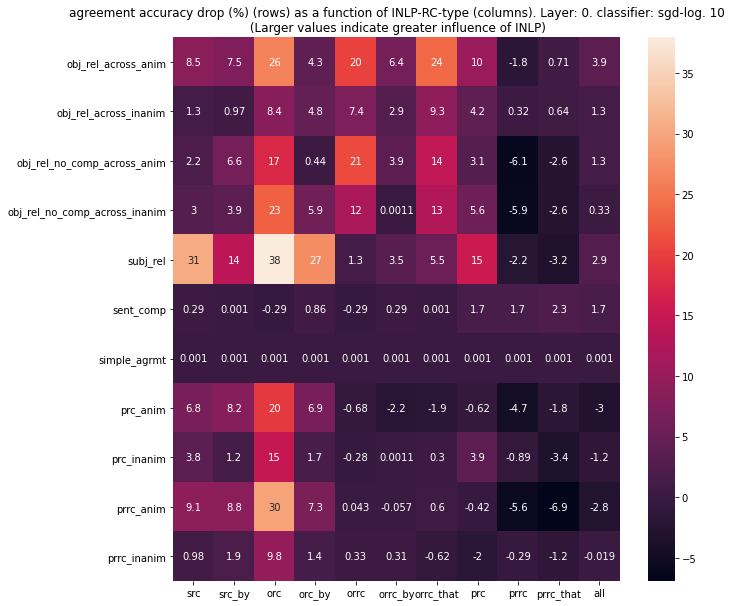

In [107]:
plot(labels_rows, labels_columns, sims, "0", "sgd-log", "10")